## 📦 Librerías y Configuración Inicial

Para nuestros ejemplos, usaremos las siguientes librerías esenciales en ingeniería de datos:

In [37]:
import pandas as pd          # Manipulación y análisis de datos
import sqlite3              # Base de datos SQL ligera
import numpy as np          # Operaciones numéricas
import json                 # Manejo de datos JSON
import logging              # Sistema de logs
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configuración de logging para monitorear el pipeline
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Extraemos los datos a través de la base de datos en excel

In [38]:
def extract_from_database() -> pd.DataFrame:

    try:
        logger.info("Iniciando extracción de datos...")
        
        # Cargar los datos
         # Cargar los datos
        file_path = '..\\data\\raw\\Paper1_WebData_Final.csv'
        df = pd.read_csv(file_path)
        
        print("--- 1. Datos Crudos Extraídos ---")
        print(f"Registros extraídos: {len(df)}")
        print(f"Columnas: {list(df.columns)}")
        print("\nPrimeras filas:")
        print(df)
        print("\nInformación del DataFrame:")
        print(df.info())
        print('')
        
        logger.info(f"Extracción completada: {len(df)} registros")
        
        return df
        
    except Exception as e:
        logger.error(f"Error en la extracción: {str(e)}")
        raise

# Probamos la extracción de los datos

In [39]:
df = extract_from_database()

2025-09-07 00:45:18,891 - INFO - Iniciando extracción de datos...


--- 1. Datos Crudos Extraídos ---
Registros extraídos: 1114966
Columnas: ['test_date', 'nid', 'L500k', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k', 'R500k', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k', 'gender', 'naics', 'age_group', 'region', 'NAICS_descr']

Primeras filas:
           test_date      nid  L500k   L1k   L2k   L3k   L4k   L6k   L8k  \
0        12-FEB-2007        1   10.0   5.0   5.0  15.0   5.0   0.0  20.0   
1        29-FEB-2008        2   15.0   5.0  15.0  20.0  20.0  15.0  15.0   
2        08-FEB-2006        3   25.0  20.0  15.0  20.0  35.0  25.0  15.0   
3        29-FEB-2008        6   10.0  10.0  10.0  35.0  50.0  30.0  10.0   
4        08-FEB-2006        8   15.0  15.0   5.0  15.0  45.0  30.0  20.0   
...              ...      ...    ...   ...   ...   ...   ...   ...   ...   
1114961  11-DEC-2001  3214185   20.0  15.0  20.0  15.0  25.0  15.0  25.0   
1114962  02-DEC-2002  3214186    5.0   5.0  15.0  50.0  60.0  55.0  25.0   
1114963  31-JAN-2001  3214187   10.0   5.0   5

2025-09-07 00:45:21,247 - INFO - Extracción completada: 1114966 registros


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114966 entries, 0 to 1114965
Data columns (total 21 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   test_date    1114966 non-null  object 
 1   nid          1114966 non-null  int64  
 2   L500k        1114910 non-null  float64
 3   L1k          1114900 non-null  float64
 4   L2k          1114905 non-null  float64
 5   L3k          1114905 non-null  float64
 6   L4k          1114932 non-null  float64
 7   L6k          1114889 non-null  float64
 8   L8k          1112680 non-null  float64
 9   R500k        1114897 non-null  float64
 10  R1k          1114896 non-null  float64
 11  R2k          1114893 non-null  float64
 12  R3k          1114899 non-null  float64
 13  R4k          1114914 non-null  float64
 14  R6k          1114868 non-null  float64
 15  R8k          1112659 non-null  float64
 16  gender       1111722 non-null  object 
 17  naics        1114966 non-null  int64  
 18  ag

## Parte del proceso EDA: Exploración de los datos

En esta etapa del análisis exploratorio de datos (EDA), nos enfocamos en examinar el tipo de datos con los que estamos trabajando, así como en entender sus distribuciones y su significado.

In [40]:
def ver_distribucion(df: pd.DataFrame):
    try:
        logger.info("Verificando distribución de datos...")
        print(df.describe(include='all'))
        logger.info("Distribución verificada.")
    except Exception as e:
        logger.error(f"Error al verificar distribución: {str(e)}")
        raise
ver_distribucion(df)

2025-09-07 00:45:21,321 - INFO - Verificando distribución de datos...
2025-09-07 00:45:22,830 - INFO - Distribución verificada.


          test_date           nid         L500k           L1k           L2k  \
count       1114966  1.114966e+06  1.114910e+06  1.114900e+06  1.114905e+06   
unique         3137           NaN           NaN           NaN           NaN   
top     05-MAR-2008           NaN           NaN           NaN           NaN   
freq           2879           NaN           NaN           NaN           NaN   
mean            NaN  1.793365e+06  9.533200e+00  8.793782e+00  1.138195e+01   
std             NaN  1.113799e+06  2.050912e+01  2.181823e+01  2.547234e+01   
min             NaN  1.000000e+00 -1.000000e+01 -1.000000e+01 -1.000000e+01   
25%             NaN  4.963842e+05  5.000000e+00  5.000000e+00  5.000000e+00   
50%             NaN  2.311976e+06  1.000000e+01  5.000000e+00  1.000000e+01   
75%             NaN  2.644766e+06  1.500000e+01  1.000000e+01  1.500000e+01   
max             NaN  3.214191e+06  9.990000e+02  9.990000e+02  9.990000e+02   

                 L3k           L4k           L6k   

# Ahora vamos a verificar el tipo de dato de todas las columnas y si es necesario cambiarlo :
columna | tipo de dato
- test_date      String (fecha)
- nid           numérico
- L500k         numérico
- L1k           numérico
- L2k           numérico
- L3k           numérico
- L4k           numérico
- L6k           numérico
- L8k           numérico
- R500k         numérico
- R1k           numérico
- R2k           numérico
- R3k           numérico
- R4k           numérico
- R6k           numérico
- R8k           numérico
- gender         String
- naics          Numérico #North American Industry Classification System 2007 code
- age_group      Numérico #Age group (1= 1825 years; 2 = 2635; 3 = 3645; 4 = 4655; 5 = 5665)
- region         String
- NAICS_descr    String North American Industry Classification System 2007 code industry title

In [41]:
def check_type_data(df:pd.DataFrame) -> pd.DataFrame:
    type_data = df.dtypes
    type_df = pd.DataFrame({'Data Type': type_data})
    print("\n--- 3. Tipo de Datos por Columna ---")
    print(type_df)

    print("\nConvertimos el tipo de dato")
    columnas_numericas = ["nid",'naics','L500k', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k', 'R500k', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k' ,"age_group"]
    columnas_string = ["gender","region","NAICS_descr"]
    columnas_fecha = ["test_date"] 

    for col in df.columns:
        if col in columnas_numericas:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        elif col in columnas_string:
            df[col] = df[col].astype('string')
        elif col in columnas_fecha:
            df[col] = pd.to_datetime(df[col], errors='coerce',dayfirst=True ,format='%d-%b-%Y')
        else:
            print(f"Columna no categorizada: {col}")

    print("\n--- 4. Tipo de Datos Después de la Conversión ---")
    print(type_df)
    return df

df = check_type_data(df)


--- 3. Tipo de Datos por Columna ---
            Data Type
test_date      object
nid             int64
L500k         float64
L1k           float64
L2k           float64
L3k           float64
L4k           float64
L6k           float64
L8k           float64
R500k         float64
R1k           float64
R2k           float64
R3k           float64
R4k           float64
R6k           float64
R8k           float64
gender         object
naics           int64
age_group       int64
region         object
NAICS_descr    object

Convertimos el tipo de dato

--- 4. Tipo de Datos Después de la Conversión ---
            Data Type
test_date      object
nid             int64
L500k         float64
L1k           float64
L2k           float64
L3k           float64
L4k           float64
L6k           float64
L8k           float64
R500k         float64
R1k           float64
R2k           float64
R3k           float64
R4k           float64
R6k           float64
R8k           float64
gender         object
na

## Ahora vamos a hallar los datos vacíos y los vamos a reemplazar con medidas de tendencia central (esto es parte de la transformación (EDA))
hay algunos datos como 999 998 997 los cuales representan además de los datos nulos:
- 997 = refusal to test (esta fila la podemos eliminar)
- 998 = no response at maximum value (podemos reemplazarlo con el dato máximo)
- 999 = not tested (podemos reemplazarlo con medidas de tendencia central)


In [47]:

# miramos cuantos datos nulos hay en cada columna
def check_missing_data(df):
    missing_data = df.isnull().sum()
    # buscamos 997 998 999 en las columnas de frecuencias de la audiometria
    colums_to_check = ['L500k', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k', 'R500k', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k', 'gender']
    for col in colums_to_check:
        if col in df.columns:
            missing_data += df[col].isin([997, 998, 999]).sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
    
    print("\n--- 2. Datos Faltantes por Columna ---")
    print(missing_df)
    
    return missing_df

check_missing_data(df)


--- 2. Datos Faltantes por Columna ---
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


,Missing Values,Percentage


## Ahora vamos a usar técnicas de imputación de datos para reemplazar los datos faltantes

In [43]:
def transform_data(df:pd.DataFrame):
    try:
        
        logger.info("Iniciando transformación de datos...")
        # Reemplazamos los valores 997, 999 por NaN el 998 no por que esto significa que no respondio al maximo nivel de la prueba
        df.replace([997, 999], np.nan, inplace=True)

        # Reemplazamos el valor 998 por 100 (valor maximo de la prueba audiometrica)
        df.replace(998, 100, inplace=True)
        # Hallamos el promedio de las columnas de frecuencias de la audiometria que no son nulas
        columnas_frecuencias =['L500k', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k', 'R500k', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k']
        # Validamos los rangos de las columnas de frecuencias de la audiometria (entre 0 y 100)
        for col in columnas_frecuencias:
            df.loc[(df[col] < 0) | (df[col] > 100), col] = np.nan

        promedios = df[columnas_frecuencias].mean()
        # Rellenar NaN con el promedio correspondiente
        df[columnas_frecuencias] = df[columnas_frecuencias].fillna(promedios)
        logger.info("Transformación completada exitosamente.")

        # Rellenar NaN de la columna region por la moda (lo podemos hacer porque es una columna categórica y no tiene tantos valores nulos)
        moda_region = df['region'].mode()[0]
        df['region'] = df['region'].fillna(moda_region)

        # Rellenar NaN de la columna gender por la moda (lo podemos hacer porque es una columna categórica y no tiene tantos valores nulos)
        moda_genero = df['gender'].mode()[0]
        df['gender'] = df['gender'].fillna(moda_genero)

        # ponemos en mayusculas las columnas string
        columnas_string = ["gender","region","NAICS_descr"]
        for col in columnas_string:
            df[col] = df[col].str.upper()
        # Eliminar filas con NaN en columna nid (devido a que solo  tiene 2 valores nulos)
        df = df.dropna(subset=['nid'])
        return df

    except Exception as e:
        logger.error(f"Error en la transformación: {str(e)}")
        raise

df = transform_data(df)

2025-09-07 00:45:25,118 - INFO - Iniciando transformación de datos...
2025-09-07 00:45:26,644 - INFO - Transformación completada exitosamente.


## Ahora vamos a normalizar el schema 

In [44]:
def normalize_schema(df: pd.DataFrame) -> pd.DataFrame:
    try:
        logger.info("Iniciando normalización del esquema...")
        structured_data = df.copy()
        print("--- Análisis del Esquema Original ---")
        print(f"Columnas originales: {list(structured_data.columns)}")
        print(f"Tipos de datos originales:")
        print(structured_data.dtypes)
        print()
        
        # 1. Normalizar nombres de columnas (snake_case)
        column_rename_map = {
            "nid": "worker_id",
            "Age_group": "age_group_code",
            "Gender": "gender",
            "Region": "region_code",
            "Test_date": "test_date",
            "NAICS": "naics_code",
            "NAICS_descr": "naics_description",
            
            # Left ear thresholds
            "L500k": "left_ear_500hz",
            "L1k": "left_ear_1000hz",
            "L2k": "left_ear_2000hz",
            "L3k": "left_ear_3000hz",
            "L4k": "left_ear_4000hz",
            "L6k": "left_ear_6000hz",
            "L8k": "left_ear_8000hz",

            # Right ear thresholds
            "R500k": "right_ear_500hz",
            "R1k": "right_ear_1000hz",
            "R2k": "right_ear_2000hz",
            "R3k": "right_ear_3000hz",
            "R4k": "right_ear_4000hz",
            "R6k": "right_ear_6000hz",
            "R8k": "right_ear_8000hz"
        }
                
        # Solo renombrar columnas que existen
        existing_columns = {k: v for k, v in column_rename_map.items() if k in structured_data.columns}
        structured_data = structured_data.rename(columns=existing_columns)
        
        
        # 2. Agregar metadatos de procesamiento
        structured_data['processed_at'] = datetime.now()
        structured_data['data_source'] = 'user_database'
        
        # 3. Reordenar columnas según esquema del data warehouse
        new_column_order = [
            "worker_id",
            "age_group_code",
            "gender",
            "region_code",
            "test_date",
            "naics_code",
            "naics_description",

            # Umbrales oído izquierdo
            "left_ear_500hz",
            "left_ear_1000hz",
            "left_ear_2000hz",
            "left_ear_3000hz",
            "left_ear_4000hz",
            "left_ear_6000hz",
            "left_ear_8000hz",

            # Umbrales oído derecho
            "right_ear_500hz",
            "right_ear_1000hz",
            "right_ear_2000hz",
            "right_ear_3000hz",
            "right_ear_4000hz",
            "right_ear_6000hz",
            "right_ear_8000hz"
        ]

        
        # Solo incluir columnas que existen
        available_columns = [col for col in new_column_order if col in structured_data.columns]
        structured_data = structured_data[available_columns]
        
        print("--- 3. Datos Estructurados (Esquema Normalizado) ---")
        print(f"Columnas finales: {list(structured_data.columns)}")
        print(structured_data)
        print("\nInformación del esquema final:")
        print(structured_data.info())
        print('')
        
        logger.info(f"Normalización completada: {len(structured_data)} registros estructurados")
        return structured_data
    except Exception as e:
        logger.error(f"Error en la normalización del esquema: {str(e)}")
        raise

df_datos_limpios = normalize_schema(df) # en este punto ya tenemos los datos limpios y estructurados

2025-09-07 00:45:28,044 - INFO - Iniciando normalización del esquema...


--- Análisis del Esquema Original ---
Columnas originales: ['test_date', 'nid', 'L500k', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k', 'R500k', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k', 'gender', 'naics', 'age_group', 'region', 'NAICS_descr']
Tipos de datos originales:
test_date      datetime64[ns]
nid                   float64
L500k                 float64
L1k                   float64
L2k                   float64
L3k                   float64
L4k                   float64
L6k                   float64
L8k                   float64
R500k                 float64
R1k                   float64
R2k                   float64
R3k                   float64
R4k                   float64
R6k                   float64
R8k                   float64
gender         string[python]
naics                   int64
age_group               int64
region         string[python]
NAICS_descr    string[python]
dtype: object



2025-09-07 00:45:29,057 - INFO - Normalización completada: 1114964 registros estructurados


--- 3. Datos Estructurados (Esquema Normalizado) ---
Columnas finales: ['worker_id', 'gender', 'test_date', 'naics_description', 'left_ear_500hz', 'left_ear_1000hz', 'left_ear_2000hz', 'left_ear_3000hz', 'left_ear_4000hz', 'left_ear_6000hz', 'left_ear_8000hz', 'right_ear_500hz', 'right_ear_1000hz', 'right_ear_2000hz', 'right_ear_3000hz', 'right_ear_4000hz', 'right_ear_6000hz', 'right_ear_8000hz']
         worker_id gender  test_date  \
0              1.0      M 2007-02-12   
1              2.0      M 2008-02-29   
2              3.0      M 2006-02-08   
3              6.0      M 2008-02-29   
4              8.0      M 2006-02-08   
...            ...    ...        ...   
1114961  3214185.0      M 2001-12-11   
1114962  3214186.0      M 2002-12-02   
1114963  3214187.0      M 2001-01-31   
1114964  3214189.0      F 2001-03-13   
1114965  3214191.0      M 2001-03-13   

                                         naics_description  left_ear_500hz  \
0                               STEEL INV

## Ya con los datos limpios podemos analizar y sacar conclusiones de los mismos además de poder crear otros data frames a partir del original (esto es parte del proceso de agregación)

2025-09-07 00:45:29,261 - INFO - Calculando puntajes de pérdida auditiva...
2025-09-07 00:45:29,691 - INFO - Cálculo de puntajes completado.



--- 4. Datos con Puntajes de Pérdida Auditiva ---
   worker_id hearing_loss_score_low_frequency
0        1.0                           Normal
1        2.0                           Normal
2        3.0                           Normal
3        6.0                           Normal
4        8.0                           Normal


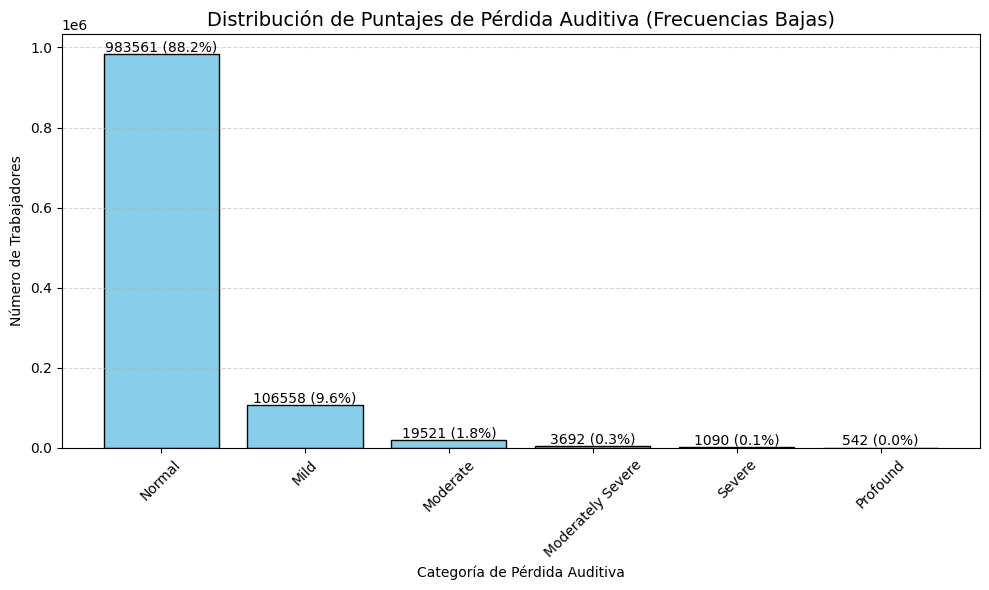

In [45]:

def new_column_hearing_loss_score_low_frequency(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    try:
        logger.info("Calculando puntajes de pérdida auditiva...")

        # Calcular promedio por oído usando operaciones vectorizadas
        left_avg = df[['left_ear_500hz', 'left_ear_1000hz', 'left_ear_2000hz', 'left_ear_4000hz']].mean(axis=1)
        right_avg = df[['right_ear_500hz', 'right_ear_1000hz', 'right_ear_2000hz', 'right_ear_4000hz']].mean(axis=1)

        # Obtener el peor (más alto) promedio de ambos oídos
        worst_avg = np.maximum(left_avg, right_avg)

        # Inicializar con 'Unknown'
        df['hearing_loss_score_low_frequency'] = 'Unknown'

        # Asignar categorías de forma vectorizada
        df.loc[worst_avg < 25, 'hearing_loss_score_low_frequency'] = 'Normal'
        df.loc[(25 <= worst_avg) & (worst_avg < 40), 'hearing_loss_score_low_frequency'] = 'Mild'
        df.loc[(40 <= worst_avg) & (worst_avg < 55), 'hearing_loss_score_low_frequency'] = 'Moderate'
        df.loc[(55 <= worst_avg) & (worst_avg < 70), 'hearing_loss_score_low_frequency'] = 'Moderately Severe'
        df.loc[(70 <= worst_avg) & (worst_avg < 90), 'hearing_loss_score_low_frequency'] = 'Severe'
        df.loc[worst_avg >= 90, 'hearing_loss_score_low_frequency'] = 'Profound'

        # Mostrar resultados
        print("\n--- 4. Datos con Puntajes de Pérdida Auditiva ---")
        print(df[['worker_id', 'hearing_loss_score_low_frequency']].head())

        logger.info("Cálculo de puntajes completado.")

        # Preparar datos para gráfico
        counts = df['hearing_loss_score_low_frequency'].value_counts()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        # Crear gráfico de barras
        plt.figure(figsize=(10, 6))
        bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

        # Añadir etiquetas de cantidad y porcentaje sobre cada barra
        for bar, count, pct in zip(bars, counts.values, percentages):
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f'{count} ({pct}%)',
                ha='center',
                va='bottom',
                fontsize=10
            )

        # Títulos y estilo
        plt.title('Distribución de Puntajes de Pérdida Auditiva (Frecuencias Bajas)', fontsize=14)
        plt.ylabel('Número de Trabajadores')
        plt.xlabel('Categoría de Pérdida Auditiva')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()

        return df

    except Exception as e:
        logger.error(f"Error al calcular puntajes de pérdida auditiva: {str(e)}")
        raise
df_analisis_score = new_column_hearing_loss_score_low_frequency(df_datos_limpios)

# Podemos ver que para las frecuencias bajas (de 500 a 4000 hz) la mayoria de las personas no presentan una disminucion auditiva considerable
La gran mayoría de los trabajadores evaluados presentan una audición normal en frecuencias bajas, representando el 88.2% del total. Sin embargo, existe un 11.8% que muestra algún grado de pérdida auditiva, siendo los casos leves (9.6%) los más comunes dentro de ese grupo. Las categorías más severas —Moderate, Moderately Severe, Severe y Profound— representan una fracción muy pequeña, pero no despreciable, del total.

Este patrón sugiere que, aunque la salud auditiva general es buena en términos poblacionales, hay una proporción significativa que podría beneficiarse de intervenciones preventivas, monitoreo regular o ajustes en el entorno laboral para evitar progresión hacia niveles más graves de pérdida auditiva.

# Ahora hacemos el mismo analisis pero para las precuencias altas (entre 6000 a 8000 hz)

2025-09-07 00:45:30,139 - INFO - Calculando puntajes de pérdida auditiva...
2025-09-07 00:45:30,542 - INFO - Cálculo de puntajes completado.



--- 4. Datos con Puntajes de Pérdida Auditiva ---
   worker_id hearing_loss_score_high_frequency
0        1.0                              Mild
1        2.0                            Normal
2        3.0                              Mild
3        6.0                            Normal
4        8.0                              Mild


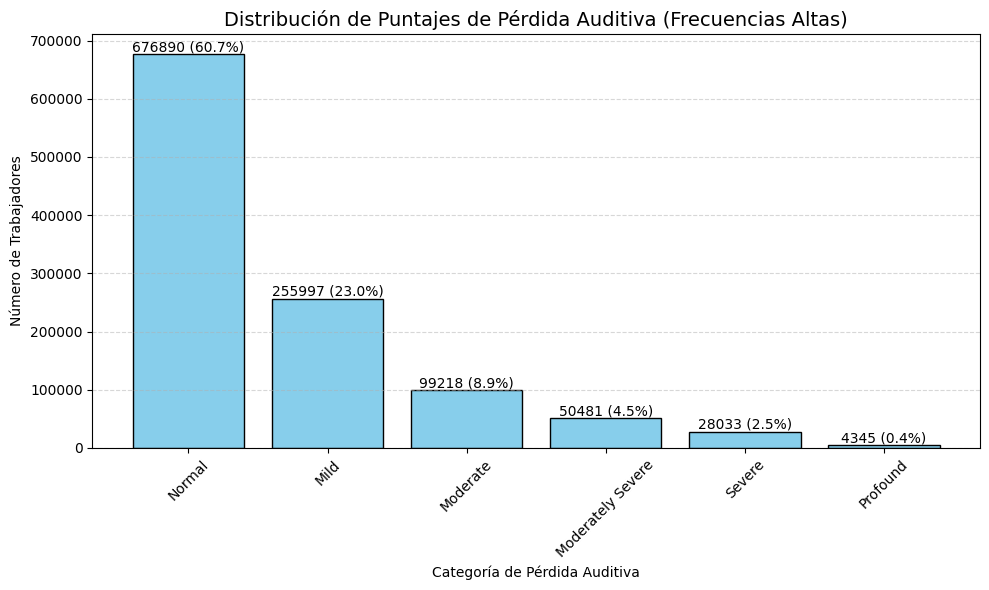

In [46]:
def new_column_hearing_loss_score_high_frequency(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    try:
        logger.info("Calculando puntajes de pérdida auditiva...")

        # Calcular promedio por oído usando operaciones vectorizadas
        left_avg = df[['left_ear_6000hz', 'left_ear_8000hz']].mean(axis=1)
        right_avg = df[['right_ear_6000hz', 'right_ear_8000hz']].mean(axis=1)

        # Obtener el peor (más alto) promedio de ambos oídos
        worst_avg = np.maximum(left_avg, right_avg)

        # Inicializar con 'Unknown'
        df['hearing_loss_score_high_frequency'] = 'Unknown'

        # Asignar categorías de forma vectorizada
        df.loc[worst_avg < 25, 'hearing_loss_score_high_frequency'] = 'Normal'
        df.loc[(25 <= worst_avg) & (worst_avg < 40), 'hearing_loss_score_high_frequency'] = 'Mild'
        df.loc[(40 <= worst_avg) & (worst_avg < 55), 'hearing_loss_score_high_frequency'] = 'Moderate'
        df.loc[(55 <= worst_avg) & (worst_avg < 70), 'hearing_loss_score_high_frequency'] = 'Moderately Severe'
        df.loc[(70 <= worst_avg) & (worst_avg < 90), 'hearing_loss_score_high_frequency'] = 'Severe'
        df.loc[worst_avg >= 90, 'hearing_loss_score_high_frequency'] = 'Profound'

        # Mostrar resultados
        print("\n--- 4. Datos con Puntajes de Pérdida Auditiva ---")
        print(df[['worker_id', 'hearing_loss_score_high_frequency']].head())

        logger.info("Cálculo de puntajes completado.")

        # Preparar datos para gráfico
        counts = df['hearing_loss_score_high_frequency'].value_counts()
        total = counts.sum()
        percentages = (counts / total * 100).round(1)

        # Crear gráfico de barras
        plt.figure(figsize=(10, 6))
        bars = plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

        # Añadir etiquetas de cantidad y porcentaje sobre cada barra
        for bar, count, pct in zip(bars, counts.values, percentages):
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f'{count} ({pct}%)',
                ha='center',
                va='bottom',
                fontsize=10
            )

        # Títulos y estilo
        plt.title('Distribución de Puntajes de Pérdida Auditiva (Frecuencias Altas)', fontsize=14)
        plt.ylabel('Número de Trabajadores')
        plt.xlabel('Categoría de Pérdida Auditiva')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()

        return df

    except Exception as e:
        logger.error(f"Error al calcular puntajes de pérdida auditiva: {str(e)}")
        raise
df_analisis_score = new_column_hearing_loss_score_high_frequency(df_analisis_score)

# Podemos observar que, en las frecuencias altas (de 6000 a 8000 Hz), la mayoría de las personas no presenta una disminución auditiva considerable. Sin embargo, los porcentajes en las demás categorías indican que en estas frecuencias sí existe una mayor afectación auditiva en ciertos casos.
La distribución de pérdida auditiva en frecuencias altas muestra una mayor afectación en comparación con las frecuencias bajas. Aunque el grupo con audición normal sigue siendo el más numeroso (60.8%), hay un 39.2% de trabajadores que presentan algún grado de pérdida auditiva en estas frecuencias, lo cual representa una proporción considerable.

Las categorías Mild (23.0%) y Moderate (8.9%) concentran la mayoría de los casos con afectación, pero también se observa una presencia significativa en niveles más severos:

Moderately Severe: 4.5%

Severe: 2.5%

Profound: 0.3%

Este patrón sugiere que las frecuencias altas son más vulnerables a deterioro auditivo, posiblemente por exposición prolongada a ruido en entornos laborales.